In [66]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import feather
import uuid
from tqdm import tqdm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from mlfinlab.microstructural_features.encoding import quantile_mapping, encode_array, encode_tick_rule_array, \
    sigma_mapping
from mlfinlab.microstructural_features.entropy import get_lempel_ziv_entropy, get_shannon_entropy,\
get_plug_in_entropy, \
    get_konto_entropy

In [3]:
def log_returns(price,lag=1):
    out=np.log(price)-np.log(price.shift(lag))
    return out

In [5]:
def guid():
    return uuid.uuid4().hex

tt='PETR4M1'
path='Features 30 MIN/'+tt.format(guid())
print (path)
data = feather.read_dataframe(path).set_index(['date_time'])
data = pd.read_feather(path).set_index(['date_time'])

data=pd.DataFrame(data[['close']]).loc[datetime(2018,1,1):datetime(2020,1,1)]

Features 30 MIN/PETR4M1


In [14]:
data2=data.copy()
data2['ret']=log_returns(data2)
data2['series']=np.sign(data2['ret']*data2['ret'].shift(-1))
data2=data2.dropna()

18.3 Draw 1000 observations from a standard Normal distribution:
(a) What is the true entropy of this process?


$h=\frac{1}{2}log(2\pi e \sigma^2)$

In [39]:
iid=pd.DataFrame(np.random.normal(0,1,1000))
print (0.5*np.log(2*np.pi*np.e))

1.4189385332046727


(b) Label the observations according to 8 quantiles.

In [72]:
dic=quantile_mapping(iid[0].drop_duplicates(),num_letters=8)
msg=encode_array(iid[0],dic)

(c) Estimate the entropy using the plug-in method.

(d) Estimate the entropy using the Kontoyiannis method:

    (i) using a window size of 10.
    
    (ii) using a window size of 100.

In [79]:
print (get_plug_in_entropy(msg))
print (get_konto_entropy(msg,10))
print (get_konto_entropy(msg,100))
print (get_shannon_entropy(msg))
print (get_konto_entropy('11100001'))
print (get_konto_entropy('01100001'))



2.810720345261101
1.9786232660792495
2.2242527123507982
2.8104358977567756
0.9682408185206046
0.8432408185206046


In [100]:
message = '11100001'
message=10*message
print (get_konto_entropy(message,2))
print (get_konto_entropy(message))
print (get_plug_in_entropy(message))
print (get_shannon_entropy(message))


0.857663690866426
0.3399157318264644
0.9998844148717589
1.0


In [113]:
message = '11100001'
print (get_konto_entropy(message,10))
print (get_konto_entropy(message))
print (get_plug_in_entropy(message))
print (get_shannon_entropy(message))
message=message+message[::-1]
print (get_konto_entropy(message,10))
print (get_konto_entropy(message))
print (get_plug_in_entropy(message))
print (get_shannon_entropy(message))

0.5804820237218405
0.9682408185206046
0.9852281360342515
1.0
0.396240625180289
0.8636919408998203
0.9967916319816366
1.0


18.4 Using the draws from exercise 3, {xt}t=1,…,1000:
    (a) Compute yt = rho*yt−1 + xt, where rho = .5, y0 = 0.
    (b) Label {yt} the observations according to 8 quantiles.
    (c) Estimate the entropy using the plug-in method.
    (d) Estimate the entropy using the Kontoyiannis method
        (i) using a window size of 10.
        (ii) using a window size of 100.

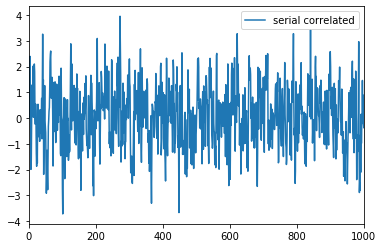

Plug in: 2.7715783659459596
Kontoyiannis (2): 1.2879805491832192
Kontoyiannis (10): 1.8905811130476093
Kontoyiannis (100): 2.125307799612995


In [ ]:
#serial correlated series
sc=[0]
rho=0.5
l=1000
for i in range(0,l):
    aux=sc[i]*rho+np.random.normal(0,1)
    sc.append(aux)
sc=pd.DataFrame(sc,columns=['serial correlated'])
sc.plot()
plt.show()
dic=quantile_mapping(sc['serial correlated'].drop_duplicates(),num_letters=8)
msg=encode_array(sc['serial correlated'],dic)
print ('Plug in:',get_plug_in_entropy(msg))
print ('Kontoyiannis (2):',get_konto_entropy(msg,2))
print ('Kontoyiannis (10):',get_konto_entropy(msg,10))
print ('Kontoyiannis (100):', get_konto_entropy(msg,100))
print ('Kontoyiannis:', get_konto_entropy(msg))